In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import json
import os
from datetime import datetime

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from lazypredict.Supervised import LazyRegressor

In [ ]:
import os
os.chdir('C:/Users/2BTOLIS-998/Documents/Proyectos/Macro/')

In [4]:
amazon = pd.read_excel('C:/Users/jmoscoso04/OneDrive - Cementos Argos S.A/Documentos/Proyectos/2B/Macro/AMZN.xlsx')
amazon = amazon[['Fecha','Close']]
amazon.columns = ['Fecha', 'value']
amazon["año"] = amazon["Fecha"].dt.year
amazon["mes"] = amazon["Fecha"].dt.month
amazon["fecha"] = amazon.apply(lambda row: str(row["año"])+"-" "0"+str(row["mes"]) \
                        if row["mes"]<10 else str(row["año"])+"-"+str(row["mes"]),axis=1)
amazon = pd.DataFrame(amazon.groupby('fecha')['value'].mean()).reset_index()
amazon = amazon[['fecha','value']]
amazon.columns = ['fecha', 'amz']

unemploy = pd.read_excel('C:/Users/jmoscoso04/OneDrive - Cementos Argos S.A/Documentos/Proyectos/2B/Macro/Unemployment.xlsx')
unemploy = unemploy[['Fecha','Actual']]
unemploy.columns = ['Fecha', 'value']
unemploy["año"] = unemploy["Fecha"].dt.year
unemploy["mes"] = unemploy["Fecha"].dt.month
unemploy["fecha"] = unemploy.apply(lambda row: str(row["año"])+"-" "0"+str(row["mes"]) \
                        if row["mes"]<10 else str(row["año"])+"-"+str(row["mes"]),axis=1)
unemploy = pd.DataFrame(unemploy.groupby('fecha')['value'].mean()).reset_index()
unemploy = unemploy[['fecha','value']]
unemploy.columns = ['fecha', 'unempl']

federal_funds = pd.read_excel('C:/Users/jmoscoso04/OneDrive - Cementos Argos S.A/Documentos/Proyectos/2B/Macro/Datos históricos Federal Funds Composite Interest Rate.xlsx')
federal_funds = federal_funds[['Fecha','Último']]
federal_funds.columns = ['Fecha', 'value']
federal_funds["value"] = federal_funds["value"]/100
federal_funds["año"] = federal_funds["Fecha"].dt.year
federal_funds["mes"] = federal_funds["Fecha"].dt.month
federal_funds["fecha"] = federal_funds.apply(lambda row: str(row["año"])+"-" "0"+str(row["mes"]) \
                        if row["mes"]<10 else str(row["año"])+"-"+str(row["mes"]),axis=1)
federal_funds = pd.DataFrame(federal_funds.groupby('fecha')['value'].mean()).reset_index()
federal_funds = federal_funds[['fecha','value']]
federal_funds.columns = ['fecha', 'federal_funds']

apparel_retailers_dj_index = pd.read_excel('C:/Users/jmoscoso04/OneDrive - Cementos Argos S.A/Documentos/Proyectos/2B/Macro/Dow Jones Apparel Retailers Historical Data.xlsx')
apparel_retailers_dj_index = apparel_retailers_dj_index[['Fecha','Price']]
apparel_retailers_dj_index.columns = ['Fecha', 'value']
apparel_retailers_dj_index.value = apparel_retailers_dj_index.value.apply(int)
apparel_retailers_dj_index["año"] = apparel_retailers_dj_index["Fecha"].dt.year
apparel_retailers_dj_index["mes"] = apparel_retailers_dj_index["Fecha"].dt.month
apparel_retailers_dj_index["fecha"] = apparel_retailers_dj_index.apply(lambda row: str(row["año"])+"-" "0"+str(row["mes"]) \
                        if row["mes"]<10 else str(row["año"])+"-"+str(row["mes"]),axis=1)
apparel_retailers_dj_index = pd.DataFrame(apparel_retailers_dj_index.groupby('fecha')['value'].mean()).reset_index()
apparel_retailers_dj_index = apparel_retailers_dj_index[['fecha','value']]
apparel_retailers_dj_index.columns = ['fecha', 'apparel_retailers']

tes_10y = pd.read_excel('C:/Users/jmoscoso04/OneDrive - Cementos Argos S.A/Documentos/Proyectos/2B/Macro/Estados Unidos 10 años Datos Históricos Rendimiento de Bonos.xlsx')
tes_10y = tes_10y[['Fecha','Último']]
tes_10y.columns = ['Fecha', 'value']
tes_10y["value"] = tes_10y["value"]/100
tes_10y["año"] = tes_10y["Fecha"].dt.year
tes_10y["mes"] = tes_10y["Fecha"].dt.month
tes_10y["fecha"] = tes_10y.apply(lambda row: str(row["año"])+"-" "0"+str(row["mes"]) \
                        if row["mes"]<10 else str(row["año"])+"-"+str(row["mes"]),axis=1)
tes_10y = pd.DataFrame(tes_10y.groupby('fecha')['value'].mean()).reset_index()
tes_10y = tes_10y[['fecha','value']]
tes_10y.columns = ['fecha', 'test_10y']

gdp = pd.read_excel('C:/Users/jmoscoso04/OneDrive - Cementos Argos S.A/Documentos/Proyectos/2B/Macro/GDP.xlsx')
gdp = gdp[['Fecha','Actual']]
gdp.columns = ['Fecha', 'value']
gdp["año"] = gdp["Fecha"].dt.year
gdp["mes"] = gdp["Fecha"].dt.month
gdp["fecha"] = gdp.apply(lambda row: str(row["año"])+"-" "0"+str(row["mes"]) \
                        if row["mes"]<10 else str(row["año"])+"-"+str(row["mes"]),axis=1)
gdp = gdp[['fecha','value']]
gdp.columns = ['fecha', 'gdp']

inflation = pd.read_excel('C:/Users/jmoscoso04/OneDrive - Cementos Argos S.A/Documentos/Proyectos/2B/Macro/Inflación US.xlsx')
inflation = inflation[['Fecha','Actual']]
inflation.columns = ['Fecha', 'value']
inflation["año"] = inflation["Fecha"].dt.year
inflation["mes"] = inflation["Fecha"].dt.month
inflation["fecha"] = inflation.apply(lambda row: str(row["año"])+"-" "0"+str(row["mes"]) \
                        if row["mes"]<10 else str(row["año"])+"-"+str(row["mes"]),axis=1)
inflation = inflation[['fecha','value']]
inflation.columns = ['fecha', 'inflation']

consumer_discretionary_sp_index = pd.read_excel('C:/Users/jmoscoso04/OneDrive - Cementos Argos S.A/Documentos/Proyectos/2B/Macro/S&P 500 Consumer Discretionary index.xlsx')
consumer_discretionary_sp_index = consumer_discretionary_sp_index[['Fecha','S&P 500 Consumer Discretionary (Sector)']]
consumer_discretionary_sp_index.columns = ['Fecha', 'value']
consumer_discretionary_sp_index["año"] = consumer_discretionary_sp_index["Fecha"].dt.year
consumer_discretionary_sp_index["mes"] = consumer_discretionary_sp_index["Fecha"].dt.month
consumer_discretionary_sp_index["fecha"] = consumer_discretionary_sp_index.apply(lambda row: str(row["año"])+"-" "0"+str(row["mes"]) \
                        if row["mes"]<10 else str(row["año"])+"-"+str(row["mes"]),axis=1)
consumer_discretionary_sp_index = pd.DataFrame(consumer_discretionary_sp_index.groupby('fecha')['value'].mean()).reset_index()
consumer_discretionary_sp_index = consumer_discretionary_sp_index[['fecha','value']]
consumer_discretionary_sp_index.columns = ['fecha', 'consumer_discretionary']


luxury_sp_index = pd.read_excel('C:/Users/jmoscoso04/OneDrive - Cementos Argos S.A/Documentos/Proyectos/2B/Macro/S&P Global Luxury Index.xlsx')
luxury_sp_index = luxury_sp_index[['Fecha','S&P Global Luxury Index']]
luxury_sp_index.columns = ['Fecha', 'value']
luxury_sp_index["año"] = luxury_sp_index["Fecha"].dt.year
luxury_sp_index["mes"] = luxury_sp_index["Fecha"].dt.month
luxury_sp_index["fecha"] = luxury_sp_index.apply(lambda row: str(row["año"])+"-" "0"+str(row["mes"]) \
                        if row["mes"]<10 else str(row["año"])+"-"+str(row["mes"]),axis=1)
luxury_sp_index = pd.DataFrame(luxury_sp_index.groupby('fecha')['value'].mean()).reset_index()
luxury_sp_index = luxury_sp_index[['fecha','value']]
luxury_sp_index.columns = ['fecha', 'luxury']

decisiones_fed = pd.read_excel('C:/Users/jmoscoso04/OneDrive - Cementos Argos S.A/Documentos/Proyectos/2B/Macro/Decisiones de PM FED.xlsx')
decisiones_fed = decisiones_fed[['Fecha','Actual']]
decisiones_fed.columns = ['Fecha', 'value']
decisiones_fed["año"] = decisiones_fed["Fecha"].dt.year
decisiones_fed["mes"] = decisiones_fed["Fecha"].dt.month
decisiones_fed["fecha"] = decisiones_fed.apply(lambda row: str(row["año"])+"-" "0"+str(row["mes"]) \
                        if row["mes"]<10 else str(row["año"])+"-"+str(row["mes"]),axis=1)
decisiones_fed = pd.DataFrame(decisiones_fed.groupby('fecha')['value'].mean()).reset_index()
decisiones_fed = decisiones_fed[['fecha','value']]
decisiones_fed.columns = ['fecha', 'fed_mp']

list_df = [amazon, unemploy, federal_funds, apparel_retailers_dj_index, tes_10y,
            gdp,inflation,consumer_discretionary_sp_index,luxury_sp_index,decisiones_fed]

df = list_df[0]
for df_ in list_df[1:]:
    df = df.merge(df_, on='fecha', how = 'left')
df = df[(df.fecha >= '2015-01') & (df.fecha <= '2022-06')]
df = df.set_index('fecha')
df

,amz,unempl,federal_funds,apparel_retailers,test_10y,gdp,inflation,consumer_discretionary,luxury,fed_mp
fecha,,,,,,,,,,
2015-01,15.137375,0.057,0.001165,827.600000,0.018856,0.002,-0.001,558.133000,2113.745238,0.0025
2015-02,18.787263,0.055,0.001137,849.631579,0.019678,-0.007,0.000,588.080000,2202.766000,0.0025
2015-03,18.766068,0.055,0.001136,883.318182,0.020399,-0.002,-0.001,600.074091,2193.807727,0.0025
2015-04,19.710643,0.054,0.001245,879.666667,0.019199,0.023,-0.002,604.350000,2211.223636,0.0025
2015-05,21.346375,0.055,0.001245,855.550000,0.021848,0.037,0.000,605.732500,2202.623810,0.0025
...,...,...,...,...,...,...,...,...,...,...
2022-02,153.783815,0.038,0.000800,1096.105263,0.019297,-0.015,0.079,1428.323158,4526.325000,0.0025
2022-03,154.280480,0.036,0.001996,1000.130435,0.021211,-0.016,0.085,1395.984783,4105.936087,0.0050
2022-04,151.308700,0.036,0.003300,1034.650000,0.027408,-0.009,0.083,1403.863000,4158.372857,0.0050


C:\Users\jmoscoso04\AppData\Local\Temp\ipykernel_16508\398160858.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_ut = np.triu(np.ones(corr_matrix.shape)).astype(np.bool)


,luxury,federal_funds,test_10y,gdp,inflation,unempl,fed_mp
fecha,,,,,,,
2015-02,0.042115,-0.024170,0.043606,-4.500000,-1.000000,-0.035088,0.00
2015-03,-0.004067,-0.000421,0.036625,-0.714286,0.000000,0.000000,0.00
2015-04,0.007939,0.096000,-0.058793,-12.500000,1.000000,-0.018182,0.00
2015-05,-0.003889,-0.000365,0.137946,0.608696,-1.000000,0.018519,0.00
2015-06,-0.009679,0.033224,0.078656,0.054054,0.000000,-0.036364,0.00
...,...,...,...,...,...,...,...
2022-02,-0.037932,0.000000,0.097033,0.071429,0.053333,-0.050000,0.00
2022-03,-0.092876,1.494565,0.099222,0.066667,0.075949,-0.052632,1.00
2022-04,0.012771,0.653595,0.292126,-0.437500,-0.023529,0.000000,0.00


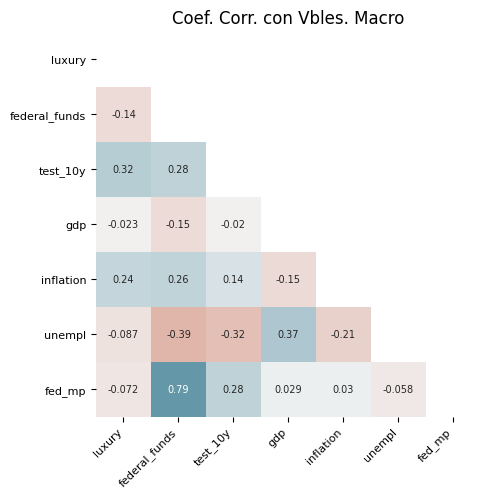

In [5]:
# Heatmap matriz de correlaciones
# ==============================================================================
# features = ['amz', 'apparel_retailers', 'consumer_discretionary', 'luxury']
# features = ['federal_funds', 'test_10y', 'gdp','inflation', 'fed_mp']
features = ['luxury', 'federal_funds', 'test_10y', 'gdp','inflation', 'unempl', 'fed_mp']
df = df[features]

df_d = (df / df.shift(1)) -1
df_d = df_d.replace([np.inf],0) 
df_d = df_d.replace([-np.inf],0)
corr_matrix = df_d[1:].corr()
mask_ut = np.triu(np.ones(corr_matrix.shape)).astype(np.bool)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.heatmap(
    corr_matrix,
    mask      = mask_ut,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 7},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
    
)
ax.set_title('Coef. Corr. con Vbles. Macro')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)  
df_d = df_d[1:]
df_d

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from lazypredict.Supervised import LazyRegressor

y = df_d['luxury']
X = df_d.drop(columns= ['luxury'])
X = sm.add_constant(X, prepend = True)
ols_model = sm.OLS(endog=y, exog=X)
ols_model = ols_model.fit()
ols_model.summary() 
# pruebas_temp['nodo'] = [node]
# pruebas_temp['variable'] = [macro]
# pruebas_temp['coef'] = [ols_model.params[1]]
# pruebas_temp['pvalue'] = [ols_model.pvalues[1]]
# pruebas = pd.concat([pruebas, pruebas_temp], axis = 0)
# pruebas[pruebas.pvalue <= 0.05]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 luxury   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     5.482
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           0.000208
Time:                        09:50:33   Log-Likelihood:                 151.98
No. Observations:                  89   AIC:                            -292.0
Df Residuals:                      83   BIC:                            -277.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0063      0.005      1.250      0.215      -0.004       0.016
federal_funds    -0.0867      0.030     -2.903      0.005      -0.146      -0.027
test_10y          0.1707      0.048      3.557      0.001       0.075       0.266
gdp              -0.0015      0.003     -0.489      0.626      -0.008       0.005
inflation         0.0247      0.008      2.994      0.004       0.008       0.041
fed_mp            0.0481      0.037      1.300      0.197      -0.025       0.122
==============================================================================
Omnibus:                       13.989   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.632
Skew:                          -0.655   Prob(JB):                     2.01e-05
Kurtosis:                       5.029   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,const,federal_funds,test_10y,gdp,inflation,fed_mp
fecha,,,,,,
2015-02,1.00,-0.02,0.04,-4.50,-1.00,0.00
2015-03,1.00,-0.00,0.04,-0.71,0.00,0.00
2015-04,1.00,0.10,-0.06,-12.50,1.00,0.00
2015-05,1.00,-0.00,0.14,0.61,-1.00,0.00
2015-06,1.00,0.03,0.08,0.05,inf,0.00
...,...,...,...,...,...,...
2022-02,1.00,0.00,0.10,0.07,0.05,0.00
2022-03,1.00,1.49,0.10,0.07,0.08,1.00
2022-04,1.00,0.65,0.29,-0.44,-0.02,0.00


,federal_funds,test_10y,gdp,inflation,fed_mp
fecha,,,,,
2015-02,-0.024170,0.043606,-4.500000,-1.000000,0.00
2015-03,-0.000421,0.036625,-0.714286,-inf,0.00
2015-04,0.096000,-0.058793,-12.500000,1.000000,0.00
2015-05,-0.000365,0.137946,0.608696,-1.000000,0.00
2015-06,0.033224,0.078656,0.054054,inf,0.00
...,...,...,...,...,...
2022-02,0.000000,0.097033,0.071429,0.053333,0.00
2022-03,1.494565,0.099222,0.066667,0.075949,1.00
2022-04,0.653595,0.292126,-0.437500,-0.023529,0.00


In [23]:
gdp

,fecha,gdp
0,2022-06,-0.006
1,2022-05,-0.006
2,2022-04,-0.009
3,2022-03,-0.016
4,2022-02,-0.015
...,...,...
124,2012-02,0.019
125,2012-01,0.022
126,2011-12,0.030
127,2011-11,0.030


In [136]:
df.dtypes

fecha                      object
amz                       float64
federal_funds             float64
apparel_retailers         float64
test_10y                  float64
gdp                       float64
inflation                 float64
consumer_discretionary    float64
luxury                    float64
fed_mp                    float64
dtype: object